# Homework 1

In [1]:
import gzip
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

## Question 1

In [2]:
path = "amazon_reviews_us_Gift_Card_v1_00.tsv.gz"
f = gzip.open(path, 'rt', encoding="utf8")
header = f.readline().strip().split('\t')

dataset = []
for line in f:
    line = line.split('\t')
    d = dict(zip(header, line))
    d['star_rating'] = int(d['star_rating'])
    if d['verified_purchase'] == 'Y':
        d['verified_purchase'] = True
    else:
        d['verified_purchase'] = False

    d2 = {}
    for field in ['star_rating','review_body', 'verified_purchase']:
        d2[field] = d[field]
    dataset.append(d2)
    
ratingCounts = {1:0, 2:0, 3:0, 4:0, 5:0}
for i in dataset:
    ratingCounts[i['star_rating']] += 1

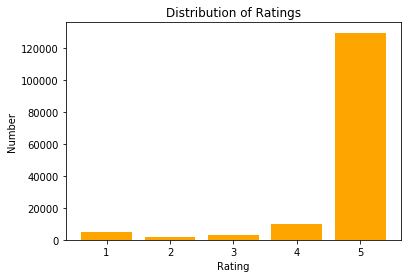

5-star rating: 129709
4-star rating: 9859
3-star rating: 3156
2-star rating: 1569
1-star rating: 4793


In [3]:
plt.bar(list(ratingCounts.keys()), list(ratingCounts.values()), color='orange')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number")
plt.title("Distribution of Ratings")
plt.show()

print("5-star rating: " + str(ratingCounts[5]))
print("4-star rating: " + str(ratingCounts[4]))
print("3-star rating: " + str(ratingCounts[3]))
print("2-star rating: " + str(ratingCounts[2]))
print("1-star rating: " + str(ratingCounts[1]))

## Question 3   

In [4]:
def feature(datum):
    return[1,datum['verified_purchase'],len(datum['review_body'])]

X = [feature(d) for d in dataset]
y = [d['star_rating'] for d in dataset]
theta,residuals,rank,s = np.linalg.lstsq(X,y,rcond=None)
print('theta 0:', theta[0])
print('theta 1:', theta[1])
print('theta 2:', theta[2])

theta 0: 4.844618169670858
theta 1: 0.050414826490218397
theta 2: -0.001246598946382356


### Briefly describe your interpretation of these values, i.e., what do θ0, θ1, and θ2 represent? Explain these in terms of the features and labels, e.g. if the coefficient of "review length" is negative, what would that say about positive versus negative reviews?



* θ0, θ1 and θ2 are coefficients of the straight line that best fits the given data points. 
* θ0 is the intercept term, representing the rating of an univerified purchase with no review (+4.845); θ1 is the coefficient of ‘verified purchase,’ representing how much rating changes when purchase become verified (+0.050); θ3 is the coefficient of ‘review length,’ representing how much rating changes when review length increases by a unit (-0.001). 
* A positive θ1 means verified purchase correlates to a lower rating while a negative θ2 means longer reviews correlates to a lower rating.

## Question 4

In [5]:
def feature(datum):
    return[1,datum['verified_purchase']]

X = [feature(d) for d in dataset]
y = [d['star_rating'] for d in dataset]
theta,residuals,rank,s = np.linalg.lstsq(X,y,rcond=None)
print('theta 0:', theta[0])
print('theta 1:', theta[1])

theta 0: 4.577583563321579
theta 1: 0.1685242563197587


### Provide an explanation as to why these coefficients might vary so significantly (1 mark). You should consider both of the features from Q3 in your explanation.

* θ0 changes from 4.84 to 4.57 while θ1 changes from 0.05 to 0.17. These changes mean that rating of an univerified purchase with no review decreases, while rating changes more than before when purchase become verified. 
* One reason for smaller θ0 might be that the negative "review length" term is no longer present to bring down the original value and one reason for bigger θ1 might be that the feature "verified purchase" is influencial to star rating on its own, but becomes less influencial when compared to the feature "review length". 

## Question 5  

In [6]:
index=int(len(dataset)*0.9)
training = dataset[:index]
testing = dataset[index:]

train_X = [feature(d) for d in training]
train_y = [d['star_rating'] for d in training]
theta,residuals,rank,s = np.linalg.lstsq(train_X,train_y,rcond=None)
print('MSE on the training set:', residuals[0]/len(training))

test_X = [feature(d) for d in testing]
test_y = [d['star_rating'] for d in testing]
MSE = mean_squared_error(test_y, np.dot(test_X, theta))
print("MSE on test set:",MSE)

MSE on the training set: 0.6557415620285985
MSE on test set: 0.971382324163011


## Question 7

In [7]:
MSE_training = []
MSE_testing = []
intervals =  np.linspace(0.05, 0.95, 10)
for p in intervals:
    index = int(len(dataset)*p)
    training = dataset[:index]
    testing = dataset[index:]
    X = [feature(d) for d in training]
    y = [d['star_rating'] for d in training]
    theta,residuals,rank,s = np.linalg.lstsq(X,y,rcond=None)
    MSE_training.append(residuals/len(training))
    
    X = [feature(d) for d in testing]
    y = [d['star_rating'] for d in testing]
    MSE_testing.append(mean_squared_error(y, np.dot(X, theta)))

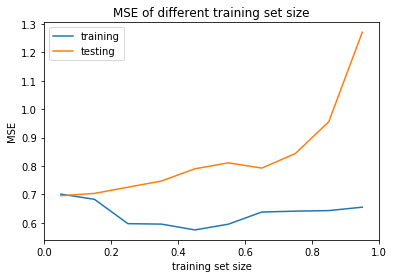

In [8]:
plt.plot(intervals, MSE_training, label = 'training')
plt.plot(intervals, MSE_testing, label = 'testing')
plt.title('MSE of different training set size')
plt.xlabel("training set size")
plt.xlim(0, 1, 10)
plt.ylabel("MSE")
plt.legend(loc='best')
plt.show()

### Does the size of the training set make a significant difference in testing performance? Comment on why it might or might not make a significant difference in this instance.
* Yes. Testing performance is the best when training set size is the smallest and testing performance gets worse as training set size increases. The phenomenon is counter-intuitive as testing performance should get better as the size of training set increases because the training set has become more tolerant. 
* In this instance, the testing error starts to soar when the training set begins to use around the first 85% of the data. This may be the result of a dataset that is drastically different just before and just after the first 85% of the data. Unlike taking a small fraction of the data and let the different parts near the end offset each other, taking the first 85% as training and last 15% as testing results in very different training and testing data that hurt testing performance.

## Question 8

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
def feature(datum):
    return[1,datum['star_rating'],len(datum['review_body'])]
X = [feature(d) for d in dataset]
y = [d['verified_purchase'] for d in dataset]
index=int(len(dataset)*0.9)
X_train, X_test, y_train, y_test = X[:index], X[index:], y[:index], y[index:]

logreg.fit(X_train, y_train)
prediction=logreg.predict(X_test)
print('classification accuracy', sum(prediction==y_test)/len(y_test))
print('proportion of labels that are positive', sum(y_test)/len(y_test))
print('proportion of predictions that are positive:', sum(prediction)/len(prediction))

classification accuracy 0.5589241397813401
proportion of labels that are positive 0.5586558454624724
proportion of predictions that are positive: 0.9990609698839628


## Question 9

In [10]:
path = "amazon_reviews_us_Gift_Card_v1_00.tsv.gz"
f = gzip.open(path, 'rt', encoding="utf8")
header = f.readline().strip().split('\t')

dataset = []
for line in f:
    line = line.split('\t')
    d = dict(zip(header, line))
    d['star_rating'] = int(d['star_rating'])
    if d['verified_purchase'] == 'Y':
        d['verified_purchase'] = True
    else:
        d['verified_purchase'] = False

    d2 = {}
    for field in ['star_rating','review_body', 'verified_purchase', 'helpful_votes', 'total_votes']:
        d2[field] = d[field]
    dataset.append(d2)

In [11]:
def feature(datum):
    return[1,datum['star_rating']**0.5,int(datum['helpful_votes']),int(datum['total_votes']),len(datum['review_body'])**0.5]
X = [feature(d) for d in dataset]
y = [d['verified_purchase'] for d in dataset]
index=int(len(dataset)*0.9)
X_train, X_test, y_train, y_test = X[:index], X[index:], y[:index], y[index:]

logreg.fit(X_train, y_train)
prediction=logreg.predict(X_test)
print('classification accuracy', sum(prediction==y_test)/len(y_test))
print('proportion of labels that are positive', sum(y_test)/len(y_test))
print('proportion of predictions that are positive:', sum(prediction)/len(prediction))

classification accuracy 0.5594607284190757
proportion of labels that are positive 0.5586558454624724
proportion of predictions that are positive: 0.9983902340867932


### Considering same prediction problem as above, can you come up with a more accurate predictor (e.g. using features from the text, timestamp, etc.)? Write down the feature vector you design, and report its train/test accuracy.
* The variable that whether a purchase is verified or not is rather random and is not strongly correlated to longer review and higher rating. Therefore I choose to use the square root of review length and the square root of rating to replace original value as new features to reduce their influence. Moreover, a verified purchase may lead to higher vote. So I added two other features, 'helpful_votes' and 'total_votes'. These change altogether lead to a little increase in trai/test accuracy from 0.5589 to 0.5594.